In [7]:
import numpy

d = numpy.random.randn(10, 5)



w = exclude_self(d)

In [26]:
from sklearn.neighbors import KNeighborsRegressor

n_samples, n_features = 10, 12
x = numpy.random.randn(n_samples, n_features)
y = numpy.random.randn(n_samples)

def exclude_self(d):
    # This has shape: d.shape = (n_points, n_neighbours) 
    print(d)
    tmp = numpy.min(d, axis=-1)[0] 
    assert numpy.all(tmp == d[:,0]), "tmp={0}, d={1}".format(tmp, d[:,0]) 
    w = numpy.ones_like(d)
    w[:,0]=0.0
    return w

kn_kargs = {
    "n_neighbors": 5,
    "weights": exclude_self
}

regressor = KNeighborsRegressor(**kn_kargs)

In [60]:
w_all, h_all = 100, 100
w_patch, h_patch = 10, 10
n_max = 10
patch_xywh = torch.randint(low=0, high=w_all-w_patch, size=[n_max, 4])
patch_xywh[:, -2] = w_patch
patch_xywh[:, -1] = h_patch

patch_quantity = torch.randn((n_max, 5, w_patch, h_patch))
tmp_distance = torch.ones((w_all, h_all), device=patch_quantity.device, dtype=torch.float) * 20
tmp_result = torch.zeros((5, w_all, h_all), device=patch_quantity.device, dtype=torch.float)


for n, xywh in enumerate(patch_xywh):
    x, y, w, h = xywh.unbind(dim=0)
    print(x,y,w,h)

    dw_from_center = torch.linspace(start=-0.5*(w-1), end=0.5*(w-1), steps=w)
    dh_from_center = torch.linspace(start=-0.5*(h-1), end=0.5*(h-1), steps=h)
    d2_from_center = dw_from_center[:, None].pow(2) + dh_from_center[None, :].pow(2)

    mask = (d2_from_center < tmp_distance[x:x+w, y:y+h])  # shape (w, h)
    tmp_result[:, x:x+w, y:y+h] = torch.where(mask[None], patch_quantity[n], tmp_result[:, x:x+w, y:y+h])
    tmp_distance[x:x+w, y:y+h] = torch.min(d2_from_center, tmp_distance[x:x+w, y:y+h])

tensor(75) tensor(2) tensor(10) tensor(10)
tensor(18) tensor(39) tensor(10) tensor(10)
tensor(25) tensor(66) tensor(10) tensor(10)
tensor(34) tensor(30) tensor(10) tensor(10)
tensor(2) tensor(64) tensor(10) tensor(10)
tensor(30) tensor(56) tensor(10) tensor(10)
tensor(54) tensor(37) tensor(10) tensor(10)
tensor(0) tensor(81) tensor(10) tensor(10)
tensor(27) tensor(2) tensor(10) tensor(10)
tensor(31) tensor(43) tensor(10) tensor(10)


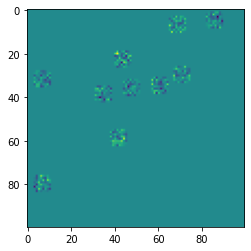

In [61]:
plt.imshow(tmp_result[0])

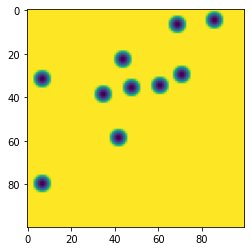

In [62]:
plt.imshow(tmp_distance)

In [ ]:
tmp_result = torch.randn((5, 100, 100))

tmp_result[:, x:x+w, y:y+h].flatten(start_dim=-2)[:, mask] = \
                        patch_quantity[n].flatten(start_dim=-2)[:,mask]

In [35]:
torch.linspace(-3,3,10)


tensor([-3.0000, -2.3333, -1.6667, -1.0000, -0.3333,  0.3333,  1.0000,  1.6667,
         2.3333,  3.0000])

In [27]:
regressor.fit(x,y)

KNeighborsRegressor(weights=<function exclude_self at 0x7fd07a4ae3a0>)

In [34]:
a = torch.ones((3,3)) * numpy.inf
print(a)

10000 < a


tensor([[inf, inf, inf],
        [inf, inf, inf],
        [inf, inf, inf]])


tensor([[True, True, True],
        [True, True, True],
        [True, True, True]])

In [28]:
regressor.predict(x)

[[0.         4.28752887 4.41932297 4.65329916 4.80185778]
 [0.         3.54611138 3.5531324  4.61624805 4.80185778]
 [0.         4.22604413 4.91770288 4.98789605 5.13930451]
 [0.         3.50518923 3.5531324  3.9182447  4.16480538]
 [0.         4.20100774 4.77197032 5.20147306 5.23403244]
 [0.         3.54611138 3.9182447  4.15882571 4.41932297]
 [0.         3.50518923 4.28752887 4.3297504  4.61624805]
 [0.         4.20100774 4.3297504  5.22956589 5.5252451 ]
 [0.         4.94861078 5.16496873 5.66677126 5.8213438 ]
 [0.         4.15882571 4.16480538 4.22604413 4.77197032]]


array([-0.55025631, -0.3687872 , -0.35773011, -0.53919922, -0.20452013,
       -0.63260911, -0.5119    , -0.65138387, -1.21035279, -0.37689243])

In [11]:
w

array([[0., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1.]])